**Sebastián González Juárez**
# Clasificar imagenes VQA.

##Descripción:
Este código tiene como objetivo aprender a pasar información de bits de imágenes a qubits mediante un feacture map. Luego de esto se aplica un anzants sencillo y se realizan las mediciones.

In [ ]:
!pip install pennylane --quiet

In [ ]:
import pennylane as qml
from pennylane import numpy as np
import numpy as onp   # para operaciones clásicas donde prefiero numpy "puro"
from math import pi
import matplotlib.pyplot as plt

## 1. Configuración

In [ ]:
n_qubits = 4   # Imagen 2x2 → 4 píxeles → 4 qubits
dev = qml.device("default.qubit", wires=n_qubits)

## 2. Codificación

In [ ]:
def encode_image(image):
    flat_img = np.array(image).flatten()
    norm = flat_img / np.max(flat_img)  # normaliza [0,1]
    for i, pixel in enumerate(norm):
        qml.RY(np.pi * pixel, wires=i)

## 3. Ansatz simple

In [ ]:
def ansatz_rotations(params):
    for i in range(n_qubits):
        qml.RX(params[i], wires=i)
        qml.RZ(params[i], wires=i)

## 4. QNode

In [ ]:
def quantum_circuit(image, params):
    encode_image(image)
    ansatz_rotations(params)
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

## 5. Imagen ejemplo 2x2

In [ ]:
image = np.array([[0, 128], [200, 255]])   # píxeles
params = np.random.uniform(0, np.pi, size=(n_qubits,))

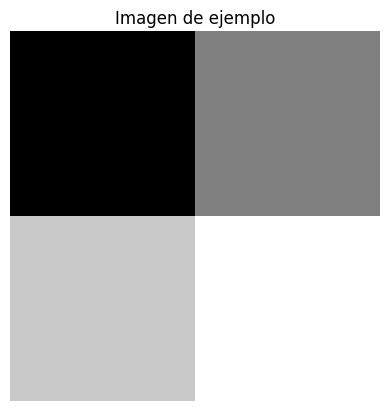

In [ ]:
plt.imshow(image, cmap='gray')
plt.title("Imagen de ejemplo")
plt.axis('off')
plt.show()

## 6. Ejecutar circuito

In [ ]:
result = quantum_circuit(image, params)
print("Resultado de mediciones ⟨Z⟩:", result)

Resultado de mediciones ⟨Z⟩: [expval(Z(0)), expval(Z(1)), expval(Z(2)), expval(Z(3))]


## 7. Dibujar el circuito

In [ ]:
print(qml.draw(quantum_circuit)(image, params))

0: ──RY(0.00)──RX(1.14)──RZ(1.14)─┤  <Z>
1: ──RY(1.58)──RX(1.07)──RZ(1.07)─┤  <Z>
2: ──RY(2.46)──RX(2.27)──RZ(2.27)─┤  <Z>
3: ──RY(3.14)──RX(1.99)──RZ(1.99)─┤  <Z>
